Model saved to C:\Users\ambyb\Desktop\Budgeting\decision_tree_model_v2.pkl

Accuracy: 0.9990029910269193

Classification Report:
                       precision    recall  f1-score   support

         Fully Spent       1.00      1.00      1.00       521
Satisfactorily Spent       0.99      1.00      1.00       128
       Underutilized       1.00      1.00      1.00       354

            accuracy                           1.00      1003
           macro avg       1.00      1.00      1.00      1003
        weighted avg       1.00      1.00      1.00      1003


Confusion Matrix:
 [[520   1   0]
 [  0 128   0]
 [  0   0 354]]


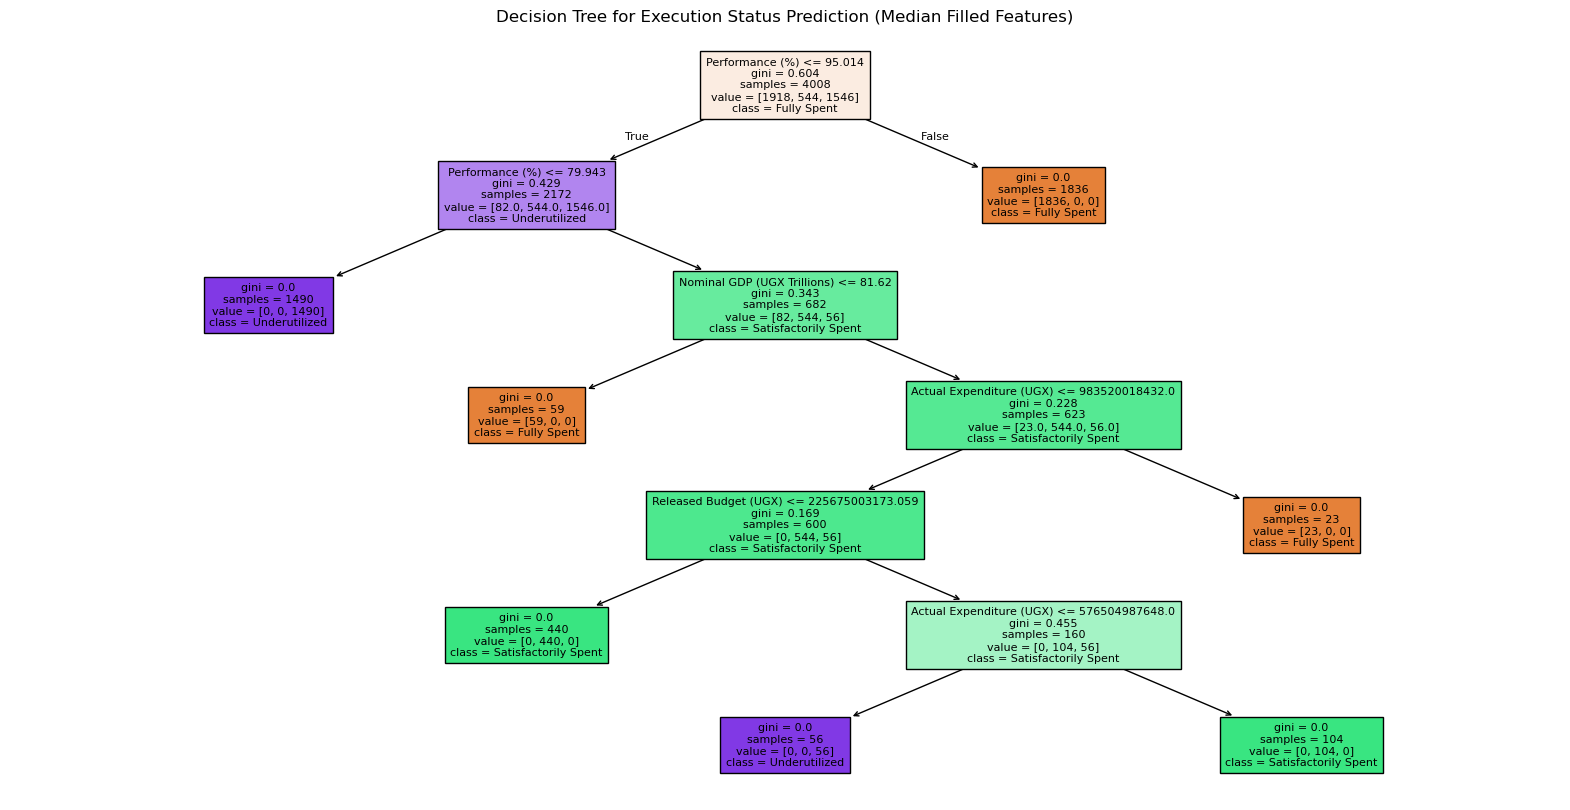

In [9]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree
import joblib


df = pd.read_csv(r"C:\Users\ambyb\Desktop\Budgeting\Budget_Performance_Data_GDP_Filled.csv")

df = df.dropna(subset=['Execution Status'])

features = [
    'Approved Budget (UGX, Millions)',
    'Released Budget (UGX)',
    'Actual Expenditure (UGX)',
    'Approved Budget (% of GDP)',
    'Actual Expenditure (% of GDP)',
    'Performance (%)',
    'Deviation (UGX)',
    'Nominal GDP (UGX Trillions)'
]

X = df[features] 
y = df['Execution Status']

le = LabelEncoder()
y_encoded = le.fit_transform(y)


X = X.fillna(X.median())

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


model_path = r"C:\Users\ambyb\Desktop\Budgeting\decision_tree_model_v2.pkl"
joblib.dump(dt_model, model_path)
print(f"Model saved to {model_path}")

loaded_model = joblib.load(model_path)

y_pred = loaded_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

plt.figure(figsize=(20,10))
tree.plot_tree(loaded_model, filled=True, feature_names=features, class_names=le.classes_, fontsize=8)
plt.title('Decision Tree for Execution Status Prediction (Median Filled Features)')
plt.show()


In [13]:
# Step 1: Create a dictionary containing both
bundle = {
    'model': dt_model,
    'encoder': le
}

# Step 2: Save the dictionary to one .pkl file
joblib.dump(bundle, r"C:\Users\ambyb\Desktop\Budgeting\decision_tree_model_bundle.pkl")

print("✅ Model and Encoder bundled and saved as 'decision_tree_model_bundle.pkl'!")


✅ Model and Encoder bundled and saved as 'decision_tree_model_bundle.pkl'!


In [19]:
import streamlit as st
import pandas as pd
import joblib

@st.cache_resource
def load_model():
    bundle = joblib.load(r"C:\Users\ambyb\Desktop\Budgeting\decision_tree_model_bundle.pkl")
    return bundle['model'], bundle['encoder']

model, encoder = load_model()

st.set_page_config(page_title="VisionBudget Decision Tree", layout="centered")
st.title("🔍 VisionBudget: Execution Status Predictor")


mode = st.radio("Choose Input Mode", ["Upload Full CSV", "Manual Entry (Single Prediction)"])

features = [
    'Approved Budget (UGX, Millions)',
    'Released Budget (UGX)',
    'Actual Expenditure (UGX)',
    'Approved Budget (% of GDP)',
    'Actual Expenditure (% of GDP)',
    'Performance (%)',
    'Deviation (UGX)',
    'Nominal GDP (UGX Trillions)'
]

if mode == "Upload Full CSV":
    uploaded_file = st.file_uploader("📂 Upload your budget data CSV", type=["csv"])
    
    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        if not all(col in df.columns for col in features):
            st.error("❌ Uploaded file is missing one or more required columns.")
        else:
            X = df[features].fillna(df[features].median())
            y_pred = model.predict(X)
            df['Predicted Execution Status'] = encoder.inverse_transform(y_pred)
            st.success("✅ Predictions completed.")
            st.dataframe(df[['Vote', 'Sector', 'Financial Year', 'Predicted Execution Status']].head(10))

            
            csv = df.to_csv(index=False).encode('utf-8')
            st.download_button("⬇️ Download Full Prediction CSV", csv, file_name="prediction_results.csv", mime='text/csv')

elif mode == "Manual Entry (Single Prediction)":
    st.markdown("Enter feature values below to predict execution status for a single budget line:")

    input_values = {}
    for feature in features:
        input_values[feature] = st.number_input(feature, value=0.0)

    if st.button("🔎 Predict"):
        X_input = pd.DataFrame([input_values])
        prediction = model.predict(X_input)
        result = encoder.inverse_transform(prediction)[0]
        st.success(f"📈 Predicted Execution Status: **{result}**")


In [21]:
model_bundle_path: "C:/Users/ambyb/Desktop/Budgeting/decision_tree_model_bundle.pkl"


In [23]:
import streamlit as st
import pandas as pd
import joblib
import yaml  

# Step 1: Load config
@st.cache_resource
def load_config():
    with open("config.yaml", "r") as file:
        config = yaml.safe_load(file)
    return config

config = load_config()

# Step 2: Load model and encoder using path from config
@st.cache_resource
def load_model():
    bundle = joblib.load(config['model_bundle_path'])
    return bundle['model'], bundle['encoder']

model, encoder = load_model()



FileNotFoundError: [Errno 2] No such file or directory: 'config.yaml'

In [25]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Load dataset
df = pd.read_csv(r"C:\Users\ambyb\Desktop\Budgeting\Budget_Performance_Data_GDP_Filled.csv")

# Step 2: Drop rows where Execution Status is missing
df = df.dropna(subset=['Execution Status'])

# Step 3: Define features and target
features = [
    'Approved Budget (UGX, Millions)',
    'Released Budget (UGX)',
    'Actual Expenditure (UGX)',
    'Approved Budget (% of GDP)',
    'Actual Expenditure (% of GDP)',
    'Performance (%)',
    'Deviation (UGX)',
    'Nominal GDP (UGX Trillions)'
]

X = df[features].fillna(df[features].median())
y = df['Execution Status']

# Step 4: Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Step 5: Split data (optional, but good practice for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Bundle model and encoder
bundle = {
    'model': rf_model,
    'encoder': encoder
}

# Step 8: Save bundle
joblib.dump(bundle, 'random_forest_model_bundle.pkl')
print("✅ RandomForest model bundle saved as 'random_forest_model_bundle.pkl'")


✅ RandomForest model bundle saved as 'random_forest_model_bundle.pkl'


In [27]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ✏️ User-defined parameters
TEST_SIZE = 0.2             # % of data to use for testing (e.g., 0.2 = 20%)
RANDOM_STATE = 42           # For reproducibility
N_ESTIMATORS = 100          # Number of trees in the forest
MAX_DEPTH = None            # You can set to e.g., 10 or 20 if you want to restrict growth

# Step 1: Load dataset
df = pd.read_csv(r"C:\Users\ambyb\Desktop\Budgeting\Budget_Performance_Data_GDP_Filled.csv")

# Step 2: Drop rows where Execution Status is missing
df = df.dropna(subset=['Execution Status'])

# Step 3: Define features and target
features = [
    'Approved Budget (UGX, Millions)',
    'Released Budget (UGX)',
    'Actual Expenditure (UGX)',
    'Approved Budget (% of GDP)',
    'Actual Expenditure (% of GDP)',
    'Performance (%)',
    'Deviation (UGX)',
    'Nominal GDP (UGX Trillions)'
]

X = df[features].fillna(df[features].median())
y = df['Execution Status']

# Step 4: Encode target labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

# Step 6: Train RandomForest model
rf_model = RandomForestClassifier(
    n_estimators=N_ESTIMATORS,
    max_depth=MAX_DEPTH,
    random_state=RANDOM_STATE
)
rf_model.fit(X_train, y_train)

# Step 7: Evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.4f}\n")
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 8: Bundle model + encoder
bundle = {
    'model': rf_model,
    'encoder': encoder
}
joblib.dump(bundle, 'random_forest_model_bundle.pkl')
print("\n✅ Model and encoder saved as 'random_forest_model_bundle.pkl'")



✅ Model Accuracy: 0.9990

📋 Classification Report:
                      precision    recall  f1-score   support

         Fully Spent       1.00      1.00      1.00       521
Satisfactorily Spent       0.99      1.00      1.00       128
       Underutilized       1.00      1.00      1.00       354

            accuracy                           1.00      1003
           macro avg       1.00      1.00      1.00      1003
        weighted avg       1.00      1.00      1.00      1003

📊 Confusion Matrix:
[[520   1   0]
 [  0 128   0]
 [  0   0 354]]

✅ Model and encoder saved as 'random_forest_model_bundle.pkl'


In [31]:
# svc_train_and_bundle.py

import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Step 2: Load the cleaned VisionBudget dataset
# Make sure this file is in the same folder as the script or provide full path
df = pd.read_csv(r"C:\Users\ambyb\Desktop\Budgeting\Budget_Performance_Data_GDP_Filled.csv")

# Step 3: Drop rows where the target label is missing
df = df.dropna(subset=["Execution Status"])

# Step 4: Define the input features and target label
features = [
    'Approved Budget (UGX, Millions)',
    'Released Budget (UGX)',
    'Actual Expenditure (UGX)',
    'Approved Budget (% of GDP)',
    'Actual Expenditure (% of GDP)',
    'Performance (%)',
    'Deviation (UGX)',
    'Nominal GDP (UGX Trillions)'
]

X = df[features].fillna(df[features].median())  # Fill missing values with median
y = df["Execution Status"]

# Step 5: Encode target categories into numeric labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Step 6: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Step 7: Initialize and train the Support Vector Classifier (SVC)
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train, y_train)

# Step 8: Evaluate the model on the test data
y_pred = svc_model.predict(X_test)

# Print model performance metrics
print(f"\n✅ Model Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("📋 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))
print("📊 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

# Step 9: Bundle and save the model with encoder
bundle = {
    "model": svc_model,
    "encoder": encoder
}

# Save to disk
joblib.dump(bundle, "svc_model_bundle.pkl")
print("\n✅ SVC model bundle saved as 'svc_model_bundle.pkl'")



✅ Model Accuracy: 0.5583

📋 Classification Report:

                      precision    recall  f1-score   support

         Fully Spent       0.54      1.00      0.70       521
Satisfactorily Spent       1.00      0.21      0.35       128
       Underutilized       1.00      0.03      0.07       354

            accuracy                           0.56      1003
           macro avg       0.85      0.41      0.37      1003
        weighted avg       0.76      0.56      0.43      1003

📊 Confusion Matrix:

[[521   0   0]
 [101  27   0]
 [342   0  12]]

✅ SVC model bundle saved as 'svc_model_bundle.pkl'


In [33]:
# svc_train_and_bundle.py (with feature scaling)

import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Step 1: Load dataset
df = pd.read_csv(r"C:\Users\ambyb\Desktop\Budgeting\Budget_Performance_Data_GDP_Filled.csv")
df = df.dropna(subset=["Execution Status"])

# Step 2: Define features and target
features = [
    'Approved Budget (UGX, Millions)',
    'Released Budget (UGX)',
    'Actual Expenditure (UGX)',
    'Approved Budget (% of GDP)',
    'Actual Expenditure (% of GDP)',
    'Performance (%)',
    'Deviation (UGX)',
    'Nominal GDP (UGX Trillions)'
]

X = df[features].fillna(df[features].median())
y = df["Execution Status"]

# Step 3: Encode target
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Step 6: Train SVC model
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train, y_train)

# Step 7: Evaluate model
y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ Scaled SVC Accuracy: {accuracy:.4f}\n")
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))
print("📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 8: Save model, encoder, and scaler
bundle = {
    "model": svc_model,
    "encoder": encoder,
    "scaler": scaler  # Optional: use this for scaling future prediction data
}
joblib.dump(bundle, "svc_model_bundle.pkl")
print("\n✅ SVC model bundle saved as 'svc_model_bundle.pkl'")



✅ Scaled SVC Accuracy: 0.8943

📋 Classification Report:
                      precision    recall  f1-score   support

         Fully Spent       0.89      0.99      0.94       521
Satisfactorily Spent       1.00      0.22      0.36       128
       Underutilized       0.89      1.00      0.94       354

            accuracy                           0.89      1003
           macro avg       0.93      0.74      0.75      1003
        weighted avg       0.91      0.89      0.87      1003

📊 Confusion Matrix:
[[516   0   5]
 [ 62  28  38]
 [  1   0 353]]

✅ SVC model bundle saved as 'svc_model_bundle.pkl'
